# Topic Modeling for Research Articles

Researchers have access to large online archives of scientific articles. As a consequence, finding relevant articles has become more difficult. Tagging or topic modelling provides a way to give token of identification to research articles which facilitates recommendation and search process.

Given the abstract and title for a set of research articles, predict the topics for each article included in the test set.

Note that a research article can possibly have more than 1 topic. The research article abstracts and titles are sourced from the following 6 topics:

1. Computer Science
2. Physics
3. Mathematics
4. Statistics
5. Quantitative Biology
6. Quantitative Finance

Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn import metrics

from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

from collections import Counter

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission_UVKGLZE.csv')

In [3]:
df

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
20967,20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20968,20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20969,20970,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0
20970,20971,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0


In [4]:
test

,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...
...,...,...,...
8984,29957,Supporting mixed-datatype matrix multiplicatio...,We approach the problem of implementing mixe...
8985,29958,An axiomatic basis for Blackwell optimality,In the theory of Markov decision processes (...
8986,29959,GeneVis - An interactive visualization tool fo...,GeneVis is a web-based tool to visualize com...
8987,29960,Quantifying the causal effect of speed cameras...,This paper quantifies the effect of speed ca...


In [5]:
sample_submission

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,0,0,0
1,20974,0,0,0,0,0,0
2,20975,0,0,0,0,0,0
3,20976,0,0,0,0,0,0
4,20977,0,0,0,0,0,0
...,...,...,...,...,...,...,...
8984,29957,0,0,0,0,0,0
8985,29958,0,0,0,0,0,0
8986,29959,0,0,0,0,0,0
8987,29960,0,0,0,0,0,0


In [6]:
columns = df.columns
columns

Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')

In [7]:
#Finding how many topics included in each article
df['No. of topics'] = (df['Computer Science'] + df['Physics'] + df['Mathematics'] + 
                       df['Statistics'] + df['Quantitative Biology'] + df['Quantitative Finance'])

df.head(3)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,No. of topics
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,1
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,1
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,1


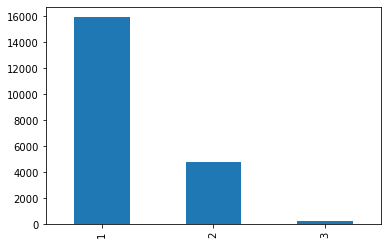

In [8]:
df['No. of topics'].value_counts().plot(kind="bar")

In [9]:
df['No. of topics'].value_counts(normalize= True)

1    0.759489
2    0.228543
3    0.011968
Name: No. of topics, dtype: float64

There are many research articles with multiple topics. This is an example of multi-label classification.
NLP and a multi-label classification..

# Data cleaning

In [10]:
from collections import Counter
results = Counter()                           #words count
df['ABSTRACT'].str.lower().str.split().apply(results.update) #spliting words and adding thier count to results
results

Counter({'predictive': 413,
         'models': 3936,
         'allow': 577,
         'subject-specific': 14,
         'inference': 939,
         'when': 4220,
         'analyzing': 315,
         'disease': 204,
         'related': 1119,
         'alterations': 19,
         'in': 65638,
         'neuroimaging': 43,
         'data.': 1616,
         'given': 2536,
         'a': 81623,
         "subject's": 11,
         'data,': 906,
         'can': 11906,
         'be': 13731,
         'made': 545,
         'at': 8566,
         'two': 5713,
         'levels:': 1,
         'global,': 5,
         'i.e.': 333,
         'identifiying': 1,
         'condition': 624,
         'presence': 849,
         'for': 39187,
         'the': 204058,
         'subject,': 19,
         'and': 81417,
         'local,': 26,
         'detecting': 292,
         'effect': 1276,
         'on': 25481,
         'each': 3123,
         'individual': 778,
         'measurement': 535,
         'extracted': 249,
        

In [11]:
one_timers = []    #identifying one time repeated words from words list(results)

for k,v in results.items():
    if v == 1:
        one_timers.append(k)

print('count of one time repeated words=', len(one_timers))        
one_timers

count of one time repeated words= 95634


['levels:',
 'identifiying',
 'rsm,',
 'wrapper-type',
 'amyloid-$\\beta$',
 'non-overlap',
 'polyharmonics',
 'cauchy-hua',
 '(llg)',
 '(fundamental',
 'memories).',
 'time-differentiable',
 '$\\theta$-linear',
 '$\\theta$).',
 '(ftir)',
 '(wtt)',
 'dwt,',
 '(rank),',
 'hayman-type',
 '"obstacle".',
 '\\max_{x}\\lambda_1(\\omega',
 'inscribe',
 '(2017',
 'lowell',
 "observatory's",
 '4.3-m',
 'hr.',
 '3:1.',
 'counterbalancing',
 '($\\approx$2000km)',
 'mars-like',
 '4km/s),',
 'shot-term',
 'natural-boosting',
 'reinfection,',
 'epidemic",',
 'epidemic"',
 '$\\mathcal{r}_{0}\\leq1$',
 '$\\mathcal{r}_{0}>1$.',
 'sobol',
 'hydraulically-fractured',
 '(roms),',
 'refracturing',
 'drilling.',
 'crowd"',
 'proverb',
 'honeycomb-like',
 '(emp)',
 '(cd,mn)se/(cd,mg)se',
 'diluted-magnetic-semiconductor',
 'emp',
 'emp,',
 '(ordered)',
 'semiautomata',
 'specified)',
 'eufe$_2$(as$_{0.79}$p$_{0.21}$)$_2$',
 '$t^{\\rm',
 '0}_{\\rm',
 'sc}=23.6$~k',
 'fm}\\sim17.7$~k',
 '(v-av)',
 'fm}$.',
 'f

In [12]:
from wordcloud import WordCloud, STOPWORDS       #importing required packages for world cloud
new_stopwords = ['based', 'paper', 'we', 'the', 'model', 'using', 'show', 'that' 'used', 
                 'use', '!', '$', '%', '&', ',', '.', 'we', 'method', 'problem', 'models']   #new stop words assumed
STOPWORDS.update(new_stopwords)
STOPWORDS.update(one_timers)       #updating stop words with one time repeated words also

In [13]:
# !pip install wordcloud

In [14]:
def remove_stopwords(text):                      #removing stop words from sentences
    from nltk.tokenize import word_tokenize

    text_tokens = word_tokenize(text)

    tokens_without_sw = [word for word in text_tokens if not word in STOPWORDS]
    
    filtered_sentence = (" ").join(tokens_without_sw)

    return filtered_sentence

In [15]:
#combining title and abstract
def data_clean(df):
    df['text'] = df['TITLE'] + df['ABSTRACT']
    df['text'] = df['text'].apply(remove_stopwords)    #applyed removing stop words to data
    
    return df

In [16]:
cleaned_data = data_clean(df)
cleaned_data.head(4)                 #data after removing stop words and one time words

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,No. of topics,text
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,1,Reconstructing Subject-Specific Effect Maps Pr...
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,1,Rotation Invariance Neural Network Rotation in...
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,1,Spherical Poisson kernels polyharmonic functio...
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,1,A finite element approximation stochastic Maxw...


In [17]:
from collections import Counter
results = Counter()
cleaned_data['text'].str.lower().str.split().apply(results.update)  #generating words from cleaned data
counter_df = pd.DataFrame.from_dict(results, orient='index')        # creating data frame with words and count
counter_df['Total'] = counter_df[0]
counter_df

,0,Total
reconstructing,65,65
subject-specific,17,17
effect,1696,1696
maps,691,691
predictive,471,471
...,...,...
conceptors,1,1
dribble,1,1
bayesians,2,2
rouder,2,2


In [18]:
# checking each word how many times repeated in each label
labels = ['Computer Science', 'Physics', 'Mathematics','Statistics', 
          'Quantitative Biology', 'Quantitative Finance']



for label in labels:
    from collections import Counter
    results = Counter()
    cleaned_data[cleaned_data[label]==1]['text'].str.lower().str.split().apply(results.update)
    temp_counter_df = pd.DataFrame.from_dict(results, orient='index')
    temp_counter_df[label] = temp_counter_df[0]
    counter_df = counter_df.merge(how='outer', left_index=True, right_index=True, right=temp_counter_df[label]) #joining data

    
counter_df.sort_values(by='Total', axis=0, ascending=False).head(15)


,0,Total,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
),35907,35907,14505.0,10718.0,9906.0,8203.0,982.0,251.0
(,35205,35205,14096.0,10546.0,9800.0,8020.0,956.0,245.0
we,24995,24995,10256.0,7448.0,6373.0,6788.0,640.0,308.0
the,19574,19574,7498.0,7688.0,3710.0,4216.0,593.0,249.0
},18549,18549,3152.0,5810.0,9948.0,2068.0,104.0,44.0
{,18548,18548,3148.0,5809.0,9952.0,2063.0,104.0,44.0
in,12928,12928,6392.0,2917.0,3241.0,3650.0,336.0,132.0
data,11419,11419,6425.0,2011.0,1145.0,5592.0,443.0,128.0
learning,7610,7610,5659.0,288.0,386.0,4935.0,237.0,40.0
results,7599,7599,3440.0,2075.0,1800.0,2031.0,245.0,102.0


In [19]:
counter_df

,0,Total,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
'',2651,2651,1120.0,803.0,609.0,660.0,110.0,44.0
'10,1,1,1.0,NaN,NaN,NaN,NaN,NaN
'11,1,1,1.0,1.0,NaN,NaN,NaN,NaN
'122,1,1,NaN,1.0,NaN,NaN,NaN,NaN
'14,1,1,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
ω^3s^,1,1,NaN,NaN,1.0,NaN,NaN,NaN
ωsl_n,1,1,NaN,NaN,1.0,NaN,NaN,NaN
ϕ-laplacian,1,1,NaN,NaN,1.0,NaN,NaN,NaN
ϕ^6,1,1,NaN,1.0,NaN,NaN,NaN,NaN


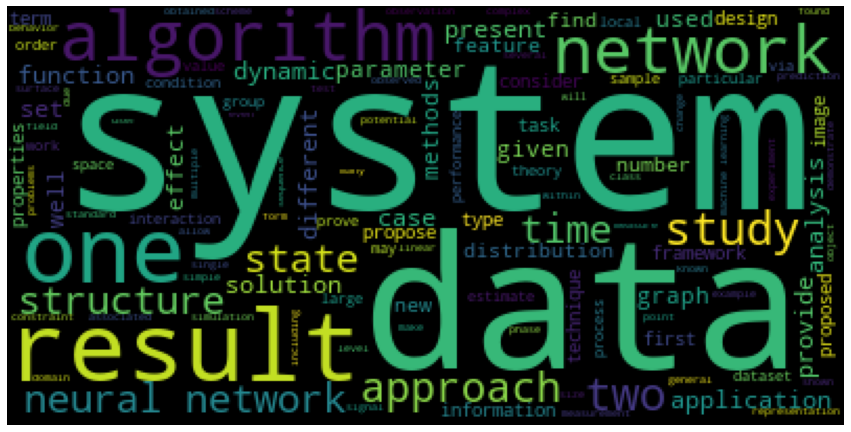

In [20]:
import matplotlib.pyplot as plt
word_string=" ".join(cleaned_data['text'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS).generate(word_string)

plt.subplots(figsize=(15,15))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Computer Science


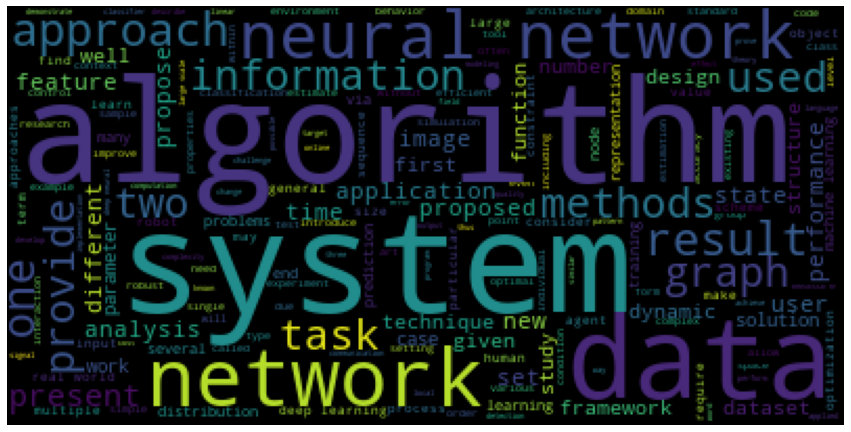

Physics


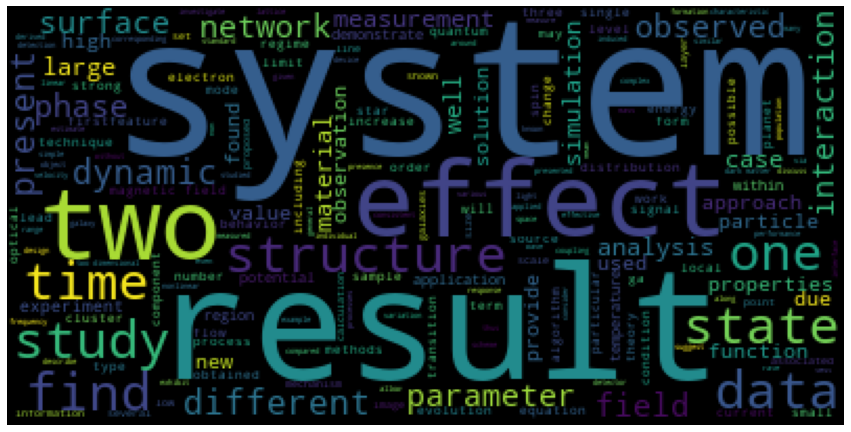

Mathematics


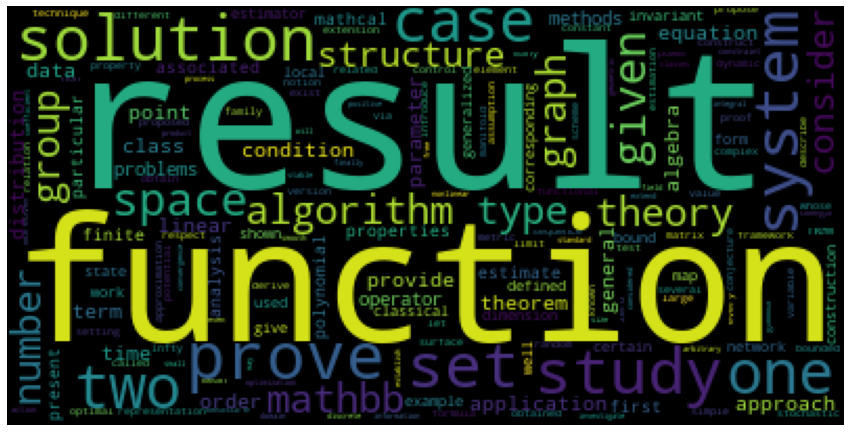

Statistics


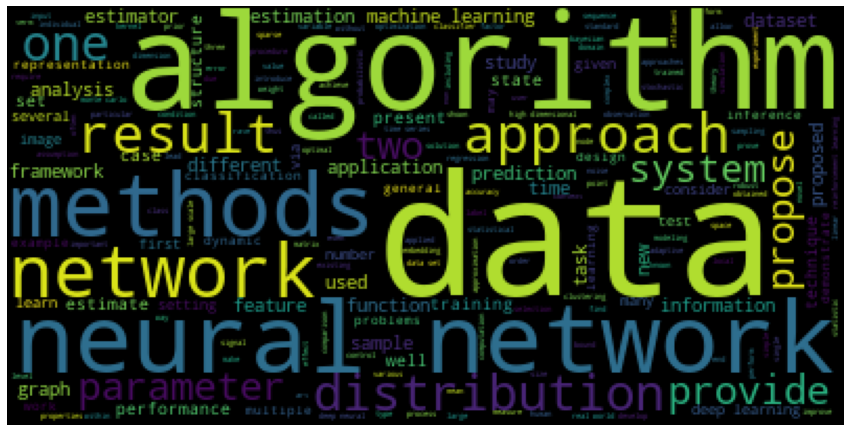

Quantitative Biology


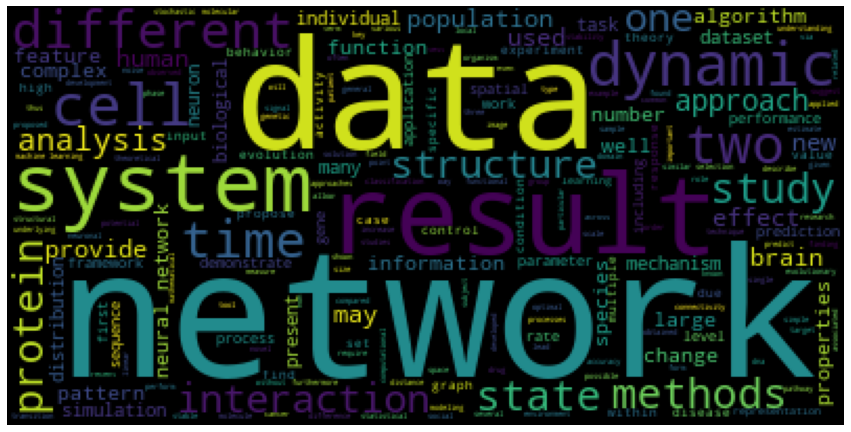

Quantitative Finance


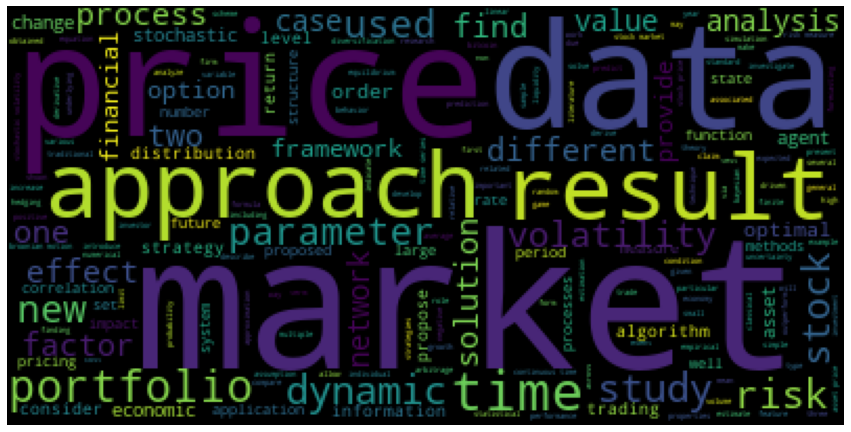

In [21]:
labels = ['Computer Science', 'Physics', 'Mathematics','Statistics', 
          'Quantitative Biology', 'Quantitative Finance']

for label in labels:
    print(label)
    word_string=" ".join(cleaned_data[cleaned_data[label]==1]['text'].str.lower())
    wordcloud = WordCloud(stopwords=STOPWORDS).generate(word_string)

    

    plt.subplots(figsize=(15,15))
    plt.title(label)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()



In [22]:
df.head(3)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,No. of topics,text
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,1,Reconstructing Subject-Specific Effect Maps Pr...
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,1,Rotation Invariance Neural Network Rotation in...
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,1,Spherical Poisson kernels polyharmonic functio...


In [23]:
X = df[['ID','TITLE', 'ABSTRACT']]
y = df[['Computer Science', 'Physics', 'Mathematics','Statistics', 
          'Quantitative Biology', 'Quantitative Finance']] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.33)  #trai and test split

submission = pd.DataFrame(X_test['ID'])

X_train = data_clean(X_train)['text']
X_test = data_clean(X_test)['text']



<ipython-input-15-8d9d7da612d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['TITLE'] + df['ABSTRACT']
<ipython-input-15-8d9d7da612d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(remove_stopwords)    #applyed removing stop words to data


In [24]:
submission

,ID
8240,8241
16004,16005
18136,18137
439,440
3719,3720
...,...
3025,3026
7054,7055
17841,17842
9704,9705


In [25]:
test

,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...
...,...,...,...
8984,29957,Supporting mixed-datatype matrix multiplicatio...,We approach the problem of implementing mixe...
8985,29958,An axiomatic basis for Blackwell optimality,In the theory of Markov decision processes (...
8986,29959,GeneVis - An interactive visualization tool fo...,GeneVis is a web-based tool to visualize com...
8987,29960,Quantifying the causal effect of speed cameras...,This paper quantifies the effect of speed ca...


In [26]:
X = df[['ID','TITLE', 'ABSTRACT']]
y = df[['Computer Science', 'Physics', 'Mathematics','Statistics', 
          'Quantitative Biology', 'Quantitative Finance']] 


submission = pd.DataFrame(test['ID'])
#submission = test

X = data_clean(X)['text']
test = data_clean(test)['text']


from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn import metrics

labels = ['Computer Science', 'Physics', 'Mathematics','Statistics', 
          'Quantitative Biology', 'Quantitative Finance']

for label in labels:
    
    text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                         ('clf', LinearSVC(random_state=0)),
    ])

    text_clf.fit(X, y[label])  

    predictions = text_clf.predict(test)

    submission[label] = predictions

<ipython-input-15-8d9d7da612d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['TITLE'] + df['ABSTRACT']
<ipython-input-15-8d9d7da612d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(remove_stopwords)    #applyed removing stop words to data


In [27]:
submission

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,0,0,0,0
...,...,...,...,...,...,...,...
8984,29957,1,0,0,0,0,0
8985,29958,1,0,0,0,0,0
8986,29959,0,0,0,0,1,0
8987,29960,0,0,0,1,0,0


In [28]:
filename = 'submission_file.csv'
submission.to_csv(filename,index=False)
